In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv('C:/Users/siddh/Desktop/Data Science Pratice/DS_Salary_Predictor/salary_data_cleaned.csv')

In [4]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Min_Salary,Max_Salary,Average_Salary,Company Age,Job_State,python_yn,R_yn,spark,aws,excel
0,Data Science Manager,$97K-$157K (Glassdoor Est.),Thank you for your interest in joining our tea...,3.5,CGB Enterprises,"New Orleans, LA","Covington, LA",1001 to 5000 employees,1969,Company - Private,...,97,157,127.0,51,LA,1,0,0,0,1
1,"VP, Data Science",$97K-$157K (Glassdoor Est.),"We are looking for a VP, Data Science to lead ...",3.9,7Park Data,"New York, NY","New York, NY",51 to 200 employees,2012,Company - Private,...,97,157,127.0,8,NY,1,0,1,0,1
2,People Data Science and Analytics Lead,$97K-$157K (Glassdoor Est.),Location: Remote\r\n\r\n\r\nCoinbase has built...,4.0,Coinbase,Remote,"San Francisco, CA",501 to 1000 employees,2012,Company - Private,...,97,157,127.0,8,Remote,0,0,0,1,1
3,Data Science Intern,$97K-$157K (Glassdoor Est.),"Fullpower® designs, develops and operates a co...",4.5,"Fullpower Technologies, Inc.","Santa Cruz, CA","Santa Cruz, CA",51 to 200 employees,2003,Company - Private,...,97,157,127.0,17,CA,1,0,0,0,0
4,Quality Systems Data Science Engineer,$97K-$157K (Glassdoor Est.),It is our people behind life’s passions who wi...,3.7,Mercury Marine,"Fond du Lac, WI","Fond du Lac, WI",1001 to 5000 employees,1939,Company - Public,...,97,157,127.0,81,WI,0,0,0,0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 24 columns):
Job Title            500 non-null object
Salary Estimate      500 non-null object
Job Description      500 non-null object
Rating               500 non-null float64
Company Name         500 non-null object
Location             500 non-null object
Headquarters         500 non-null object
Size                 500 non-null object
Founded              500 non-null int64
Type of ownership    500 non-null object
Industry             500 non-null object
Sector               500 non-null object
Revenue              500 non-null object
Competitors          500 non-null object
Min_Salary           500 non-null int64
Max_Salary           500 non-null int64
Average_Salary       500 non-null float64
Company Age          500 non-null int64
Job_State            500 non-null object
python_yn            500 non-null int64
R_yn                 500 non-null int64
spark                500 non-null int6

## Little more cleaning 

In [6]:
df['Job Title'].value_counts().head(10)

Data Science Manager        20
Data Science Instructor     17
Director of Data Science    16
Data Science Intern          8
Data Science Engineer        8
Data Science Analyst         8
Head of Data Science         7
Director, Data Science       7
Data Science                 7
Data Science Lead            6
Name: Job Title, dtype: int64

In [7]:
def title_parser(title):
    if 'data science' in title.lower():
        return 'Data Scientist'
    elif 'data engineer' in title.lower():
        return 'Data Engineer'
    elif 'analyst' in title.lower():
        return 'Analyst'
    elif 'machine learning' in title.lower():
        return 'Machine Learning Engineer'
    elif 'manager' in title.lower():
        return 'Manager'
    elif 'director' in title.lower():
        return 'Director'
    elif 'professor' in title.lower():
        return 'Professor'
    else:
        return 'N/A'

def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr.' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'Senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'Junior'
    else:
        return 'N/A'


In [8]:
# Fix job_state without abbreviations 
df['Job_State'].value_counts()

CA               89
NY               64
VA               55
MA               28
MD               28
IL               26
NJ               19
PA               18
TX               18
FL               17
WA               14
OH               13
Remote           11
DC               11
CO               10
GA                9
United States     7
MI                6
AZ                5
NC                4
NM                4
WI                3
UT                3
CT                3
MO                3
SD                2
Virginia          2
California        2
OR                2
KY                2
MN                2
SC                2
Georgia           2
KS                2
NE                2
Minnesota         1
NH                1
New Jersey        1
IN                1
TN                1
RI                1
AL                1
Ohio              1
LA                1
IA                1
DE                1
OK                1
Name: Job_State, dtype: int64

In [9]:
df['Job_State'].loc[df['Job_State']=='Ohio']='OH'
df['Job_State'].loc[df['Job_State']=='New Jersey']='NJ'
df['Job_State'].loc[df['Job_State']=='Minnesota']='MN'
df['Job_State'].loc[df['Job_State']=='Virginia']='VA'
df['Job_State'].loc[df['Job_State']=='California']='CA'
df['Job_State'].loc[df['Job_State']=='Georgia']='GA'
df['Job_State'].loc[df['Job_State']=='LA']='CA'

C:\Users\siddh\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [10]:
# Some of the Job States are US so will replace it by the state of the headquaters
df['Job_State']=df.apply(lambda x:x['Headquarters'].split(', ')[1] if x['Job_State']=='United States' else x['Job_State'],axis=1)
# Converting one to remote 
df['Job_State'].loc[df['Job_State']=='United Kingdom']='Remote'

In [11]:
# Job title and seniority cleaning 
df['Job_simple'] = df['Job Title'].apply(title_parser)
df.Job_simple.value_counts()

Data Scientist    500
Name: Job_simple, dtype: int64

In [12]:
df['Seniority'] = df['Job Title'].apply(seniority)
df.Seniority.value_counts()

N/A       396
Senior    103
Junior      1
Name: Seniority, dtype: int64

In [13]:
# Cleaning the Job description by removing '\n', '\r'
df['Job Description']=df['Job Description'].apply(lambda x: x.replace('\n','').replace('\r',' '))

In [14]:
#  Job description length 
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))

In [15]:
# Competitor count
# df['Competitors']
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [16]:
df['Rating']=df['Rating'].apply(lambda x:0 if x==-1 else x)

## EDA

In [17]:
# Setting default figure size
plt.rcParams['figure.figsize'] = (8.0, 8.0)

In [18]:
df.describe()

,Rating,Founded,Min_Salary,Max_Salary,Average_Salary,Company Age,python_yn,R_yn,spark,aws,excel,desc_len,num_comp
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,3.534600,1578.826000,88.340000,147.300000,117.820000,40.818000,0.63600,0.004000,0.256000,0.192000,0.464000,3870.068000,0.994000
std,1.164842,787.478536,57.147494,86.852615,71.755664,56.015573,0.48163,0.063182,0.436859,0.394268,0.499202,1869.438496,1.386293
min,0.000000,-1.000000,25.000000,58.000000,44.000000,-1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,68.000000,0.000000
25%,3.400000,1858.000000,51.000000,88.000000,70.000000,6.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2637.250000,0.000000
50%,3.800000,1980.000000,81.000000,129.000000,98.500000,20.000000,1.00000,0.000000,0.000000,0.000000,0.000000,3692.000000,0.000000
75%,4.100000,2002.250000,111.000000,180.000000,143.500000,52.000000,1.00000,0.000000,1.000000,0.000000,1.000000,4833.000000,3.000000
max,5.000000,2019.000000,263.000000,422.000000,342.500000,327.000000,1.00000,1.000000,1.000000,1.000000,1.000000,10265.000000,6.000000


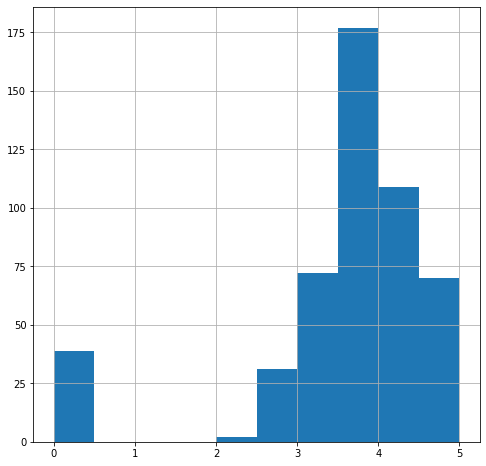

In [19]:
df.Rating.hist()

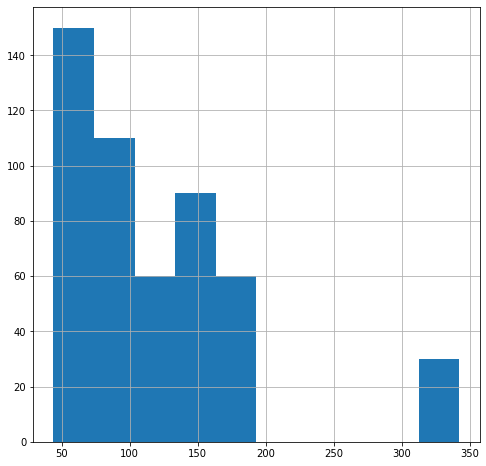

In [20]:
df.Average_Salary.hist()

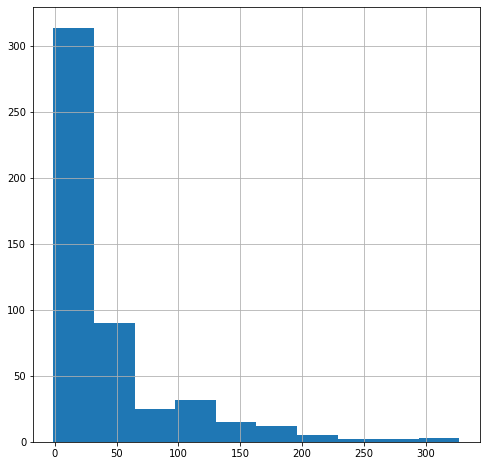

In [21]:
df['Company Age'].hist()

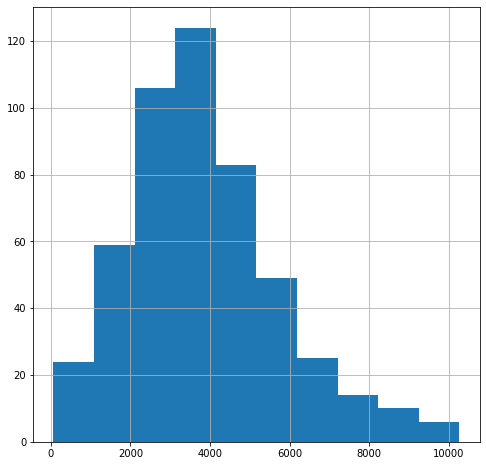

In [22]:
df.desc_len.hist()

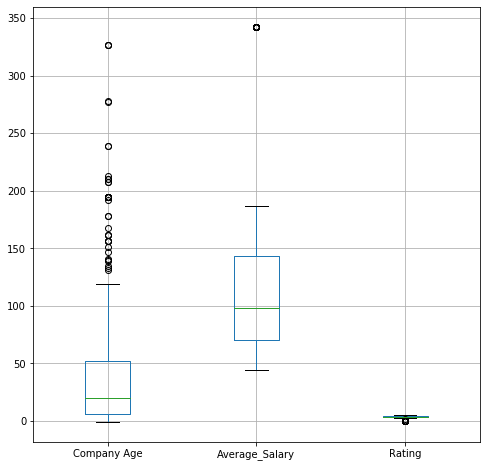

In [23]:
df.boxplot(column = ['Company Age','Average_Salary','Rating'])

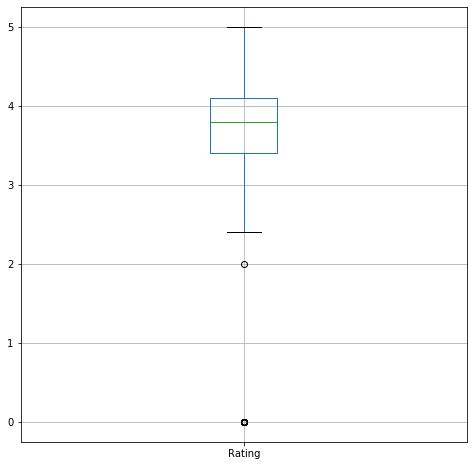

In [24]:
df.boxplot(column = 'Rating')

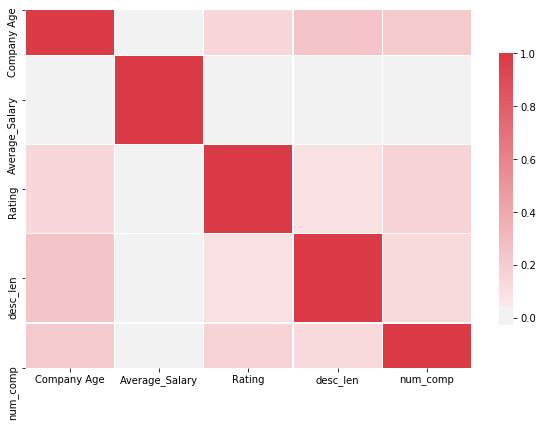

In [25]:
plt.figure(figsize=(10, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['Company Age', 'Average_Salary', 'Rating', 'desc_len', 'num_comp']].corr(), 
            cmap=cmap, square=True, center=0, linewidths=.12, cbar_kws={"shrink": .5})

In [26]:
# Categorical Variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 28 columns):
Job Title            500 non-null object
Salary Estimate      500 non-null object
Job Description      500 non-null object
Rating               500 non-null float64
Company Name         500 non-null object
Location             500 non-null object
Headquarters         500 non-null object
Size                 500 non-null object
Founded              500 non-null int64
Type of ownership    500 non-null object
Industry             500 non-null object
Sector               500 non-null object
Revenue              500 non-null object
Competitors          500 non-null object
Min_Salary           500 non-null int64
Max_Salary           500 non-null int64
Average_Salary       500 non-null float64
Company Age          500 non-null int64
Job_State            500 non-null object
python_yn            500 non-null int64
R_yn                 500 non-null int64
spark                500 non-null int6

In [30]:
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership','Company Name' ,'Industry', 'Sector', 'Revenue','Job_State', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'Job_simple', 'Seniority']]

Graph for Location: Total Length= 165


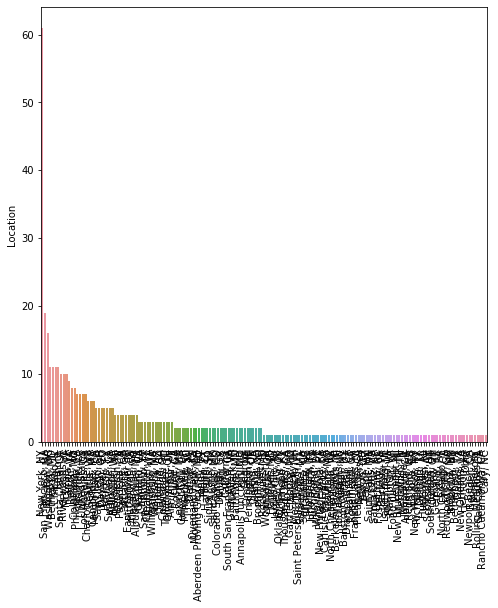

Graph for Headquarters: Total Length= 169


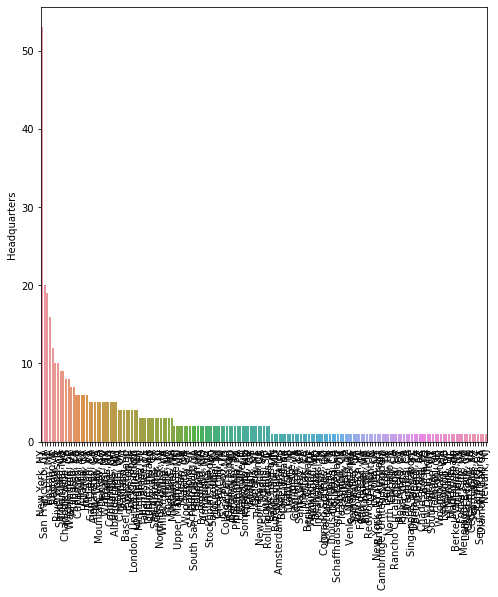

Graph for Size: Total Length= 9


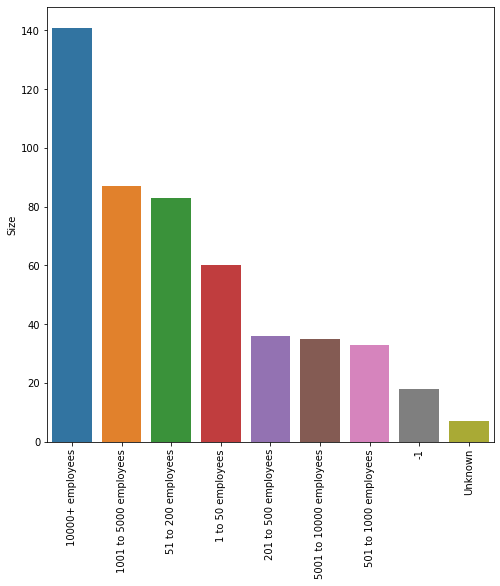

Graph for Type of ownership: Total Length= 12


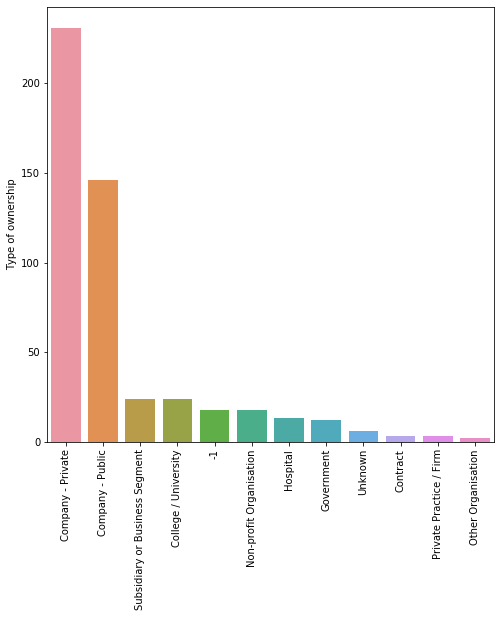

Graph for Company Name: Total Length= 328


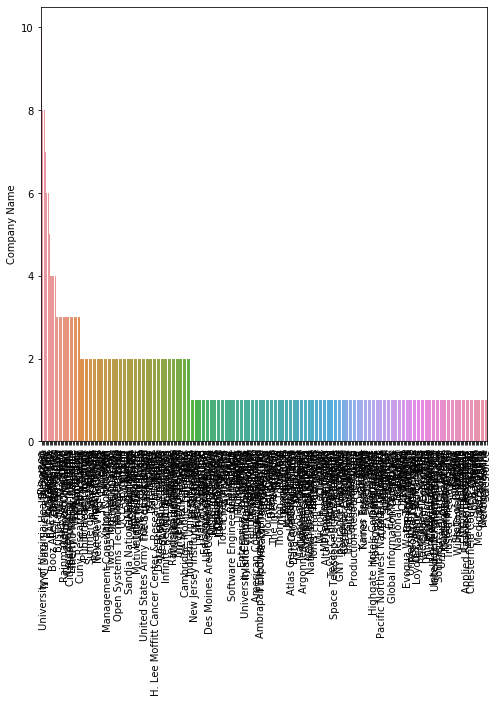

Graph for Industry: Total Length= 55


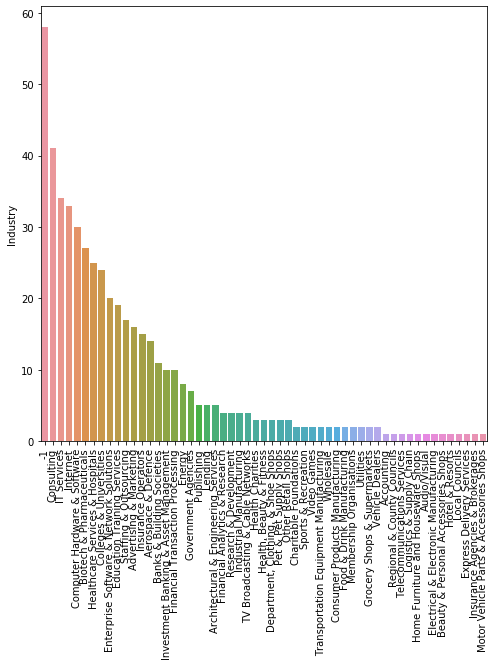

Graph for Sector: Total Length= 21


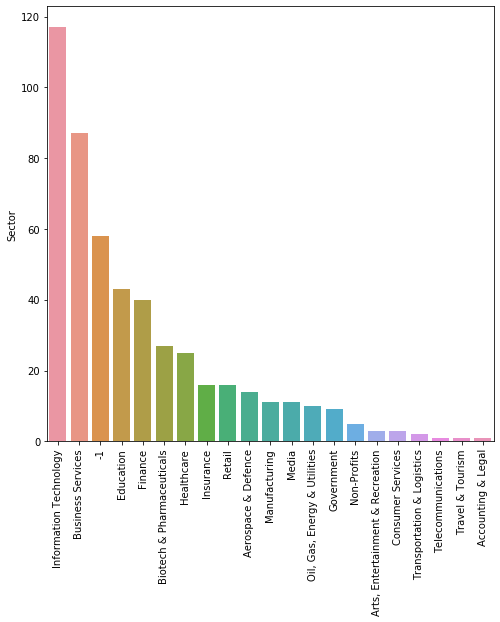

Graph for Revenue: Total Length= 13


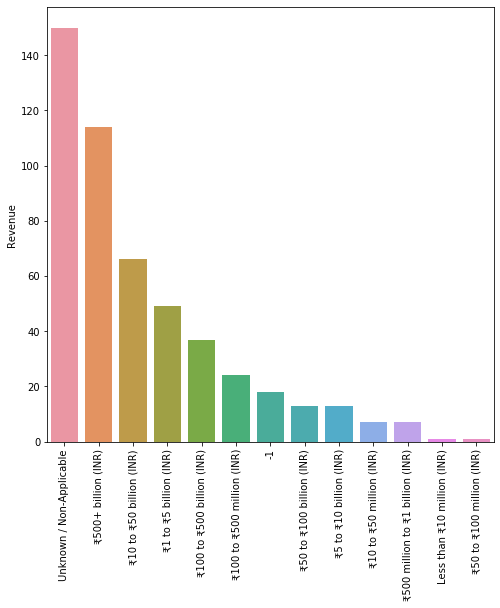

Graph for Job_State: Total Length= 39


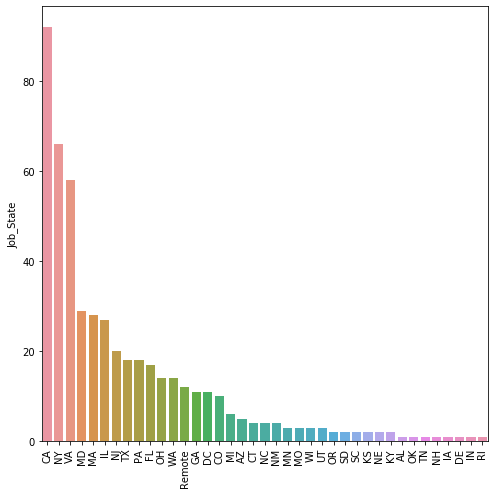

Graph for python_yn: Total Length= 2


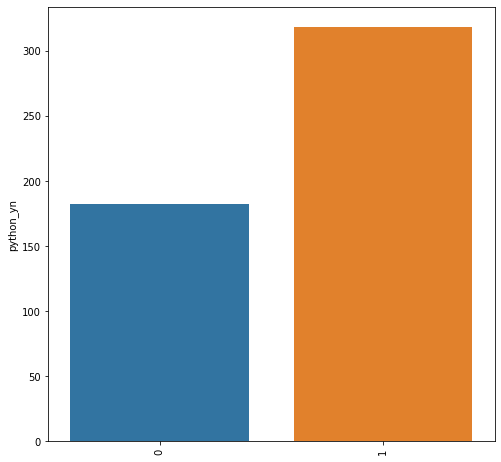

Graph for R_yn: Total Length= 2


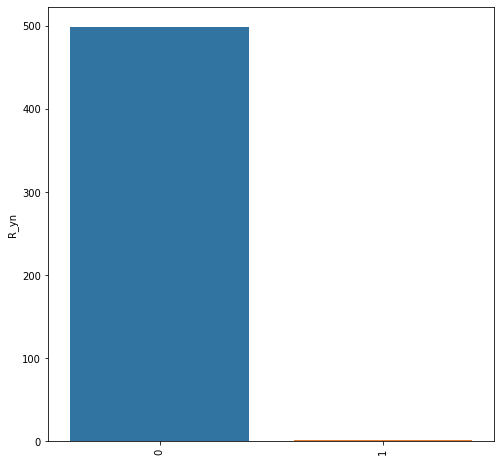

Graph for spark: Total Length= 2


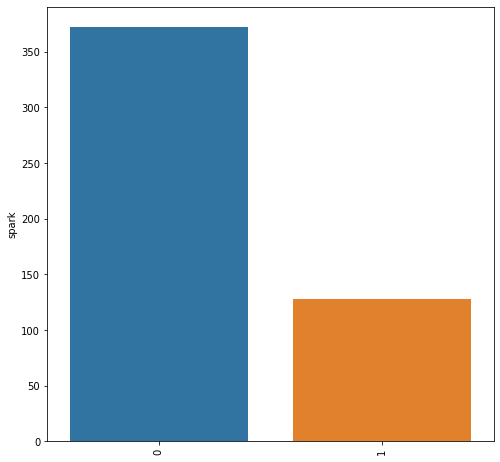

Graph for aws: Total Length= 2


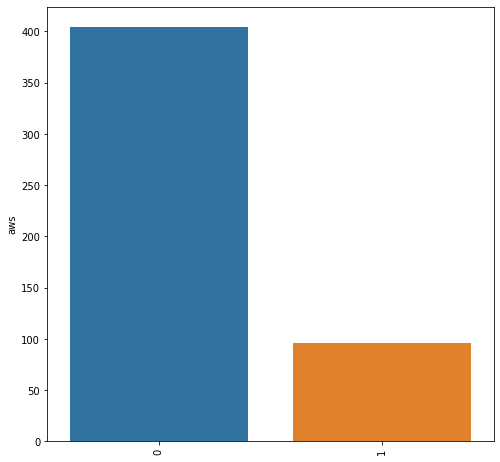

Graph for excel: Total Length= 2


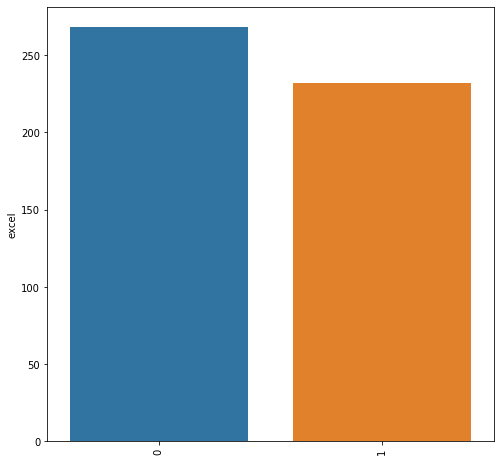

Graph for Job_simple: Total Length= 1


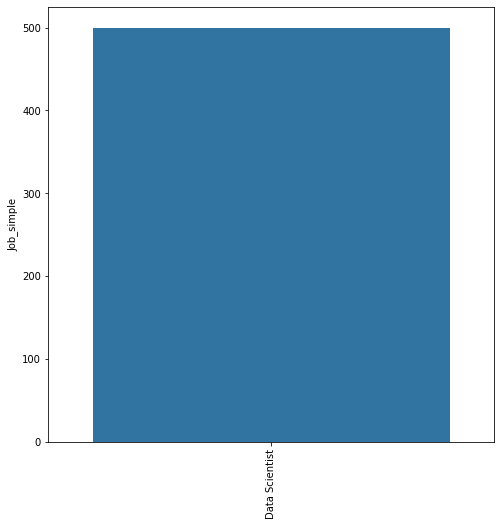

Graph for Seniority: Total Length= 3


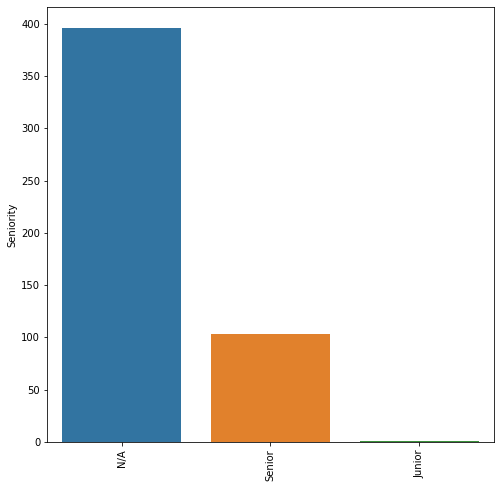

In [31]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("Graph for %s: Total Length= %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index,y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

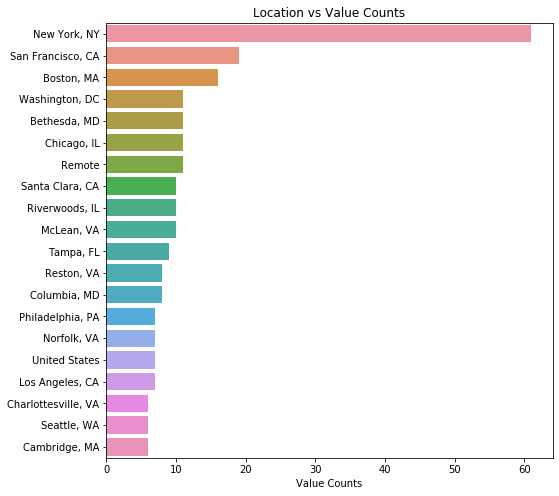

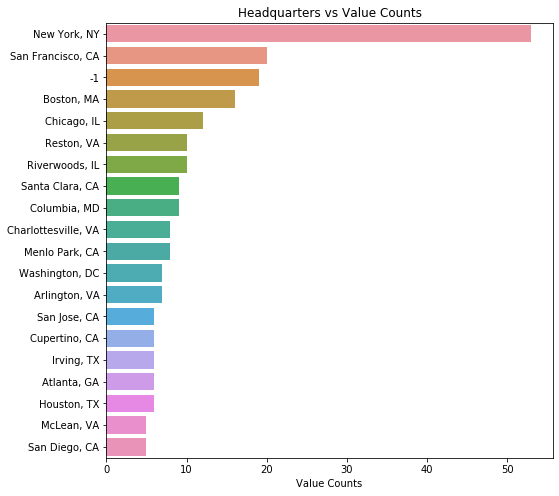

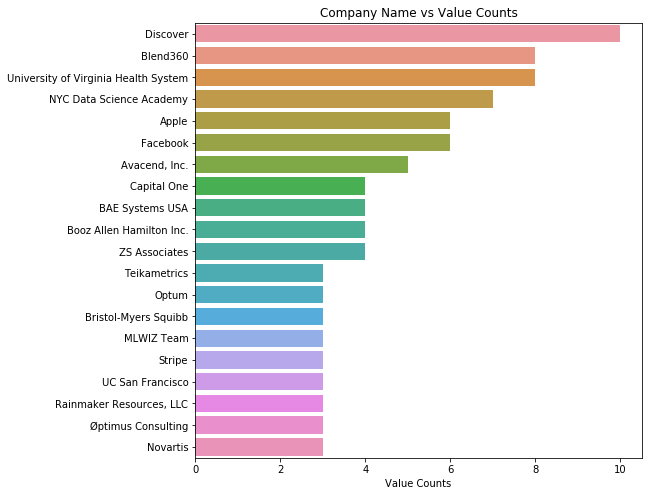

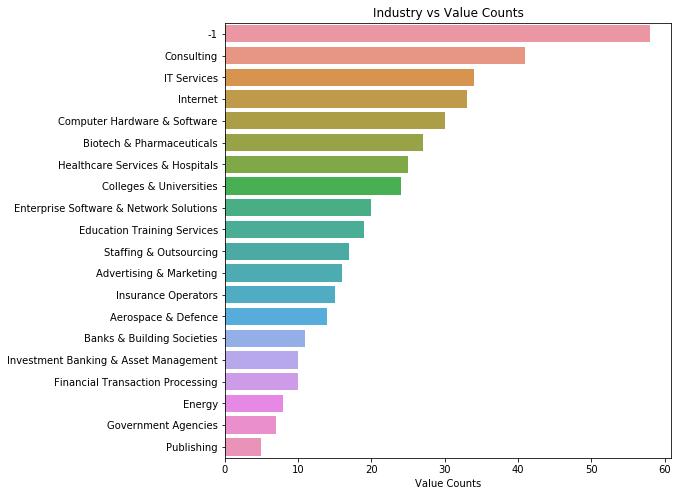

In [32]:
# For much more clarity in the graph I take the top 20 of Location, Headquarters,Industry
for i in ['Location', 'Headquarters','Company Name','Industry']:
    cat = df_cat[i].value_counts()[:20]
    chart = sns.barplot(x=cat,y=cat.index)
    plt.title('%s vs Value Counts'%i)
    plt.xlabel('Value Counts')
    plt.show()

In [33]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Min_Salary', 'Max_Salary', 'Average_Salary', 'Company Age',
       'Job_State', 'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'Job_simple',
       'Seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [34]:
pd.pivot_table(df, index = 'Job_simple', values = 'Average_Salary')

,Average_Salary
Job_simple,
Data Scientist,117.82


In [35]:
pd.pivot_table(df, index = ['Job_simple','Seniority'], values = 'Average_Salary')

Average_Salary
Job_simple     Seniority                
Data Scientist Junior          54.000000
               N/A            119.462121
               Senior         112.126214

In [36]:
pd.pivot_table(df, index = ['Job_State','Job_simple'], values = 'Average_Salary').sort_values('Average_Salary', ascending = False)

,,Average_Salary
Job_State,Job_simple,
DE,Data Scientist,342.500000
NH,Data Scientist,342.500000
WI,Data Scientist,182.500000
MI,Data Scientist,148.250000
AL,Data Scientist,146.000000
UT,Data Scientist,143.333333
SC,Data Scientist,143.250000
PA,Data Scientist,132.388889
NC,Data Scientist,131.375000


In [37]:
pd.pivot_table(df, index=['Job_State', 'Job_simple'], values='Average_Salary',
               aggfunc='count')

,,Average_Salary
Job_State,Job_simple,
AL,Data Scientist,1
AZ,Data Scientist,5
CA,Data Scientist,92
CO,Data Scientist,10
CT,Data Scientist,4
DC,Data Scientist,11
DE,Data Scientist,1
FL,Data Scientist,17
GA,Data Scientist,11


In [38]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'num_comp', 'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'Type of ownership','Average_Salary']]

In [39]:
for i in df_pivots.columns[:-1]:
    print(i)
    print(pd.pivot_table(df_pivots,index =i, values = 'Average_Salary').sort_values('Average_Salary', ascending = False))

Rating
        Average_Salary
Rating                
4.8         150.071429
4.3         148.857143
3.0         139.625000
3.1         137.821429
2.4         137.500000
3.4         135.500000
4.5         131.633333
4.1         131.409091
2.8         130.062500
4.0         128.948718
2.0         127.000000
0.0         122.935897
3.3         120.478261
3.5         120.074074
3.2         119.888889
3.9         118.583333
3.6         114.906250
2.9         111.750000
5.0         109.941176
3.8         107.531915
4.4         107.531250
2.7         107.500000
3.7         106.671429
4.2         103.055556
4.6         101.843750
4.7          94.000000
2.6          93.500000
4.9          75.625000
2.5          71.857143
Industry
                                         Average_Salary
Industry                                               
Local Councils                               342.500000
Food & Drink Manufacturing                   243.000000
Membership Organisations                     23

In [40]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python_yn', values = 'Average_Salary', aggfunc = 'count')

python_yn,0,1
Revenue,,
-1,7.0,11.0
Less than ₹10 million (INR),NaN,1.0
Unknown / Non-Applicable,34.0,116.0
₹1 to ₹5 billion (INR),14.0,35.0
₹10 to ₹50 billion (INR),30.0,36.0
₹10 to ₹50 million (INR),5.0,2.0
₹100 to ₹500 billion (INR),11.0,26.0
₹100 to ₹500 million (INR),13.0,11.0
₹5 to ₹10 billion (INR),5.0,8.0


In [41]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python_yn', values = 'Average_Salary')

python_yn,0,1
Revenue,,
-1,94.857143,147.545455
Less than ₹10 million (INR),NaN,146.000000
Unknown / Non-Applicable,116.058824,107.056034
₹1 to ₹5 billion (INR),108.285714,123.985714
₹10 to ₹50 billion (INR),132.133333,126.888889
₹10 to ₹50 million (INR),176.100000,120.000000
₹100 to ₹500 billion (INR),117.636364,110.807692
₹100 to ₹500 million (INR),85.346154,181.000000
₹5 to ₹10 billion (INR),104.700000,105.437500


### Average Salary difference between remote and normal jobs

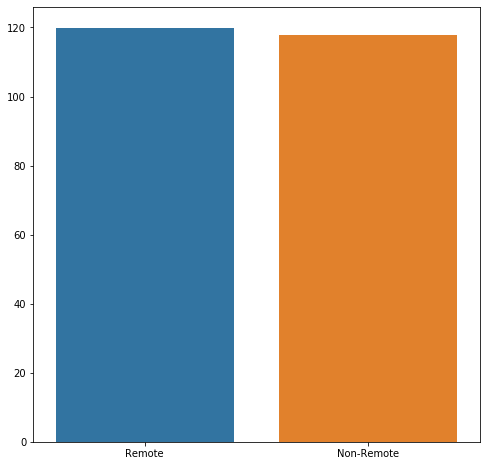

In [42]:
remotejobs=df['Average_Salary'].loc[(df['Job_State']=='Remote')]
nonremote=df['Average_Salary'].loc[~(df['Job_State']=='Remote')]
sns.barplot(y=[remotejobs.mean(),nonremote.mean()],x=['Remote','Non-Remote'])

In [43]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


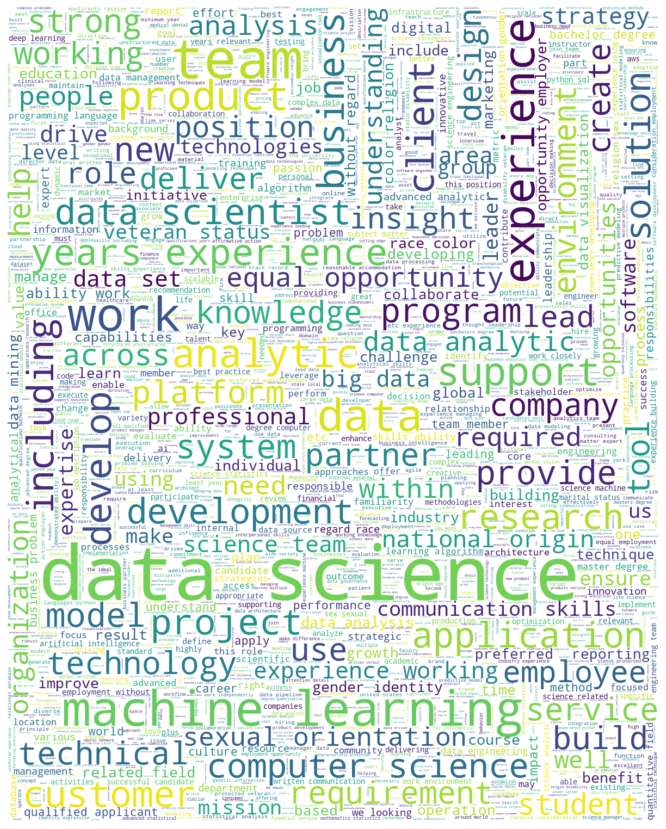

In [44]:
words = "".join(df['Job Description'])

def punctuation_remover(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_remover(words)

text = " ".join(words_filtered)

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =1200, height = 1500)
wc.generate(text)

plt.figure(figsize=[15,15])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

In [45]:
df.to_csv('C:/Users/siddh/Desktop/Data Science Pratice/DS_Salary_Predictor/eda_data.csv')